In [33]:
import numpy as np
import pandas as pd

In [34]:
def generate_gaussian_data(mean: np.ndarray, covariance: np.ndarray, num_samples: int, seed=None) -> pd.DataFrame:
    """
    Generate a DataFrame of Gaussian-distributed data.

    Parameters:
    ----------
    mean: np.ndarray
        The mean vector of the Gaussian distribution.
    covariance: np.ndarray
        The covariance matrix of the Gaussian distribution.
    num_samples: int
        The number of samples to generate.
    seed: int, optional
        Random seed for reproducibility.
        (Default is None, which means no seed is set)

    Returns:
    -------
    pd.DataFrame
        A DataFrame containing the generated Gaussian data.
    """

    if seed is not None:
        np.random.seed(seed)

    # Generate samples from a multivariate normal distribution
    samples = np.random.multivariate_normal(mean, covariance, num_samples)

    # Create a DataFrame from the samples
    df = pd.DataFrame(samples, columns=[f'x[{i+1}]' for i in range(len(mean))])

    return df

### Assignment 1

In [35]:
"""
Assignment 1:
Generate a toy dataset having 600 data points:
    200 points of them are from a Gaussian distribution with mean [2, 2] and covariance [[1, 0], [0, 1]]
    200 points of them are from a Gaussian distribution with mean [8, 3] and covariance [[1, 0], [0, 1]]
    200 points of them are from a Gaussian distribution with mean [3, 6] and covariance [[1, 0], [0, 1]]
"""
# Parameters for the Gaussian distributions
mean1 = np.array([2, 2])
mean2 = np.array([8, 3])
mean3 = np.array([3, 6])

cov = np.array([[1, 0], [0, 1]])

# Number of samples for each distribution
num_samples = 200

# Generate samples from each Gaussian distribution
df1 = generate_gaussian_data(mean1, cov, num_samples)
df2 = generate_gaussian_data(mean2, cov, num_samples)
df3 = generate_gaussian_data(mean3, cov, num_samples)

# Concatenate the DataFrames
df = pd.concat([df1, df2, df3], ignore_index=True)

# Add a label column to indicate the distribution
df['label'] = ['Class A'] * num_samples + ['Class B'] * num_samples + ['Class C'] * num_samples

# Display the first few rows of the DataFrame
print(df.head(20))

        x[1]      x[2]    label
0   1.803975  3.053282  Class A
1   1.245655  1.468177  Class A
2   2.234109  1.465112  Class A
3   2.040506  2.854079  Class A
4   4.074621  0.365613  Class A
5   1.880978  1.750908  Class A
6   1.936982  2.731518  Class A
7   2.448937  2.518874  Class A
8   3.528478  1.908861  Class A
9  -0.063464  2.065908  Class A
10  3.866936  1.465042  Class A
11  0.474227  2.128773  Class A
12  2.697959  2.046083  Class A
13  1.206598  2.139993  Class A
14  2.197362  0.856659  Class A
15  1.540432  1.278740  Class A
16  3.511261  1.421354  Class A
17  2.914720 -0.620364  Class A
18  0.493659  1.547843  Class A
19  0.136133  2.875262  Class A


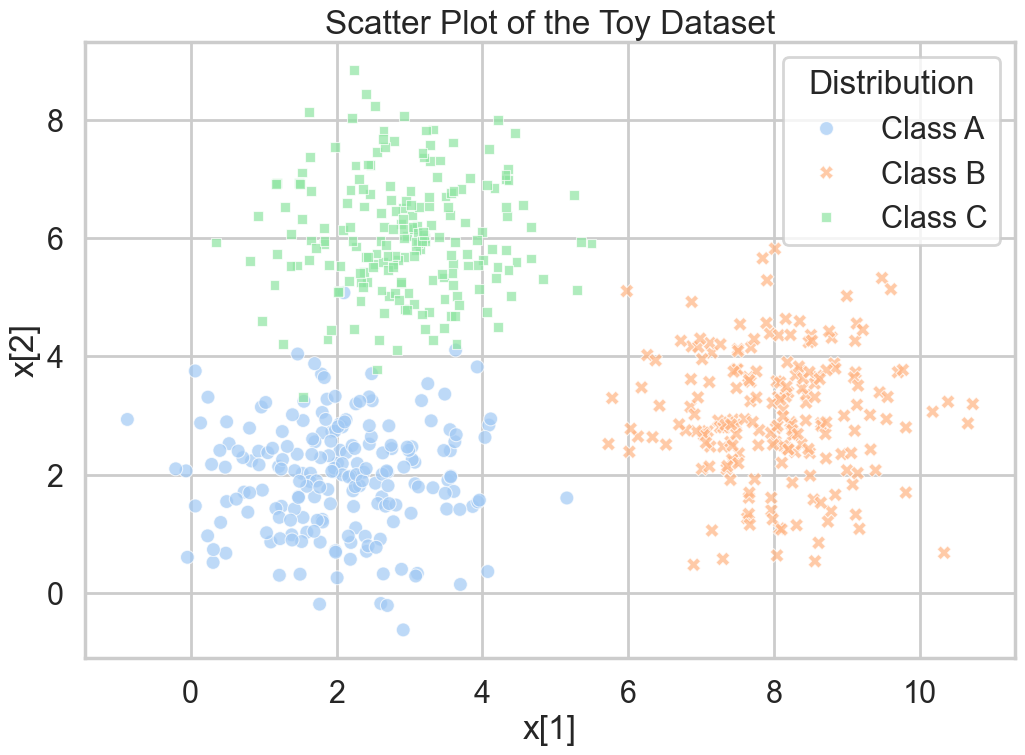

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set_style("whitegrid")
sns.set_palette("pastel")
sns.set_context("poster")

# Create a scatter plot of the data
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='x[1]', y='x[2]', hue='label', style='label', s=100, alpha=0.7)
plt.title('Scatter Plot of the Toy Dataset')
plt.xlabel('x[1]')
plt.ylabel('x[2]')
plt.legend(title='Distribution')
plt.grid(True)
plt.show()


In [37]:
import numpy as np

class KMeans:
    def __init__(self, n_clusters=3, max_iter=100, tol=1e-4, init='random', random_state=None):
        """
        Parameters:
        - n_clusters: int, number of clusters
        - max_iter: int, maximum number of iterations
        - tol: float, convergence tolerance
        - init: str, 'random' or 'kmeans++'
        - random_state: int, for reproducibility
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.tol = tol
        self.init = init
        self.random_state = random_state
        self.centroids = None
        self.labels_ = None

    def _initialize_centroids(self, X):

        rng = np.random.default_rng(self.random_state)
        
        n_samples = X.shape[0]

        if self.init == 'random':
            indices = np.random.choice(n_samples, self.n_clusters, replace=False)
            return X[indices]

        elif self.init == 'kmeans++':
            centroids = []

            # Step 1: Randomly choose the first centroid
            first_idx = rng.integers(n_samples)
            centroids.append(X[first_idx])

            # Step 2: Choose the remaining centroids
            for _ in range(1, self.n_clusters):
                # Compute distance from each point to the closest centroid
                dists = np.array([min(np.linalg.norm(x - c)**2 for c in centroids) for x in X])
                probs = dists / dists.sum()
                next_idx = np.random.choice(n_samples, p=probs)
                centroids.append(X[next_idx])
            
            return np.array(centroids)

        else:
            raise ValueError("init must be 'random' or 'kmeans++'")

    def fit(self, X):
        
        X = np.asarray(X)
        self.centroids = self._initialize_centroids(X)

        for _ in range(self.max_iter):
            # E-step: assign labels
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            labels = np.argmin(distances, axis=1)

            # M-step: update centroids
            new_centroids = np.array([
                X[labels == i].mean(axis=0) if np.any(labels == i) else self.centroids[i]
                for i in range(self.n_clusters)
            ])

            shift = np.linalg.norm(new_centroids - self.centroids, axis=1)
            if np.max(shift) < self.tol:
                break

            self.centroids = new_centroids

        self.labels_ = labels

    def predict(self, X):
        distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

    def fit_predict(self, X):
        self.fit(X)
        return self.labels_

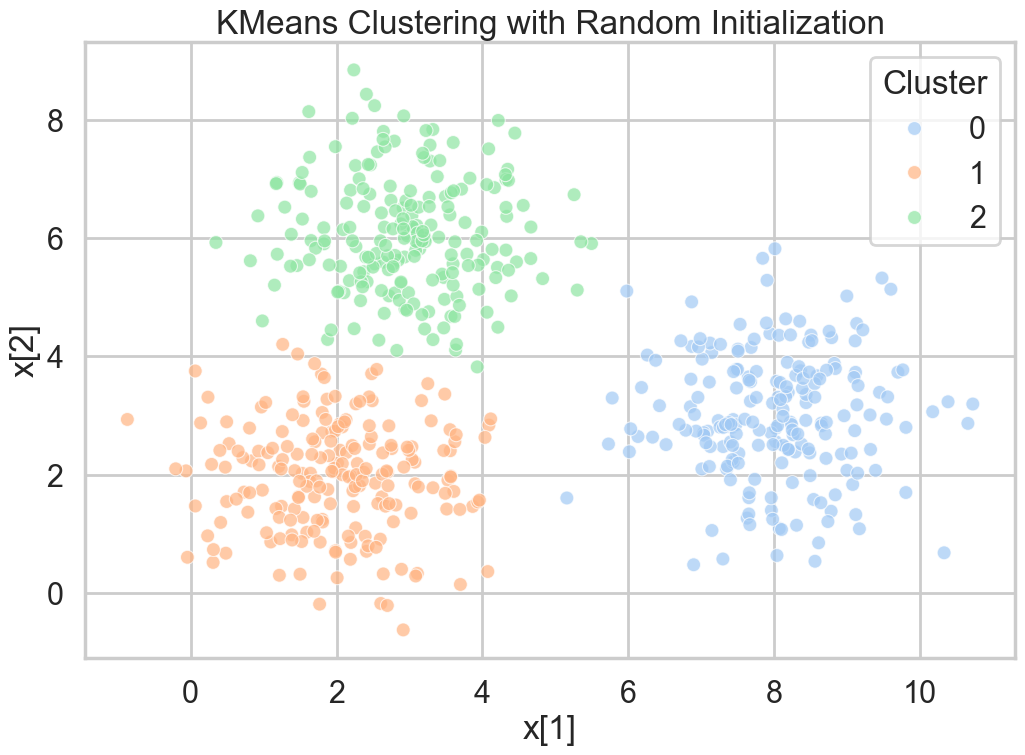

In [38]:
# Random initialization
k_means_random = KMeans(n_clusters=3, init='random')
labels_random = k_means_random.fit_predict(df[['x[1]', 'x[2]']].values)

# Plotting the results
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='x[1]', y='x[2]', hue=labels_random, palette='pastel', s=100, alpha=0.7)
plt.title('KMeans Clustering with Random Initialization')
plt.xlabel('x[1]')
plt.ylabel('x[2]')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


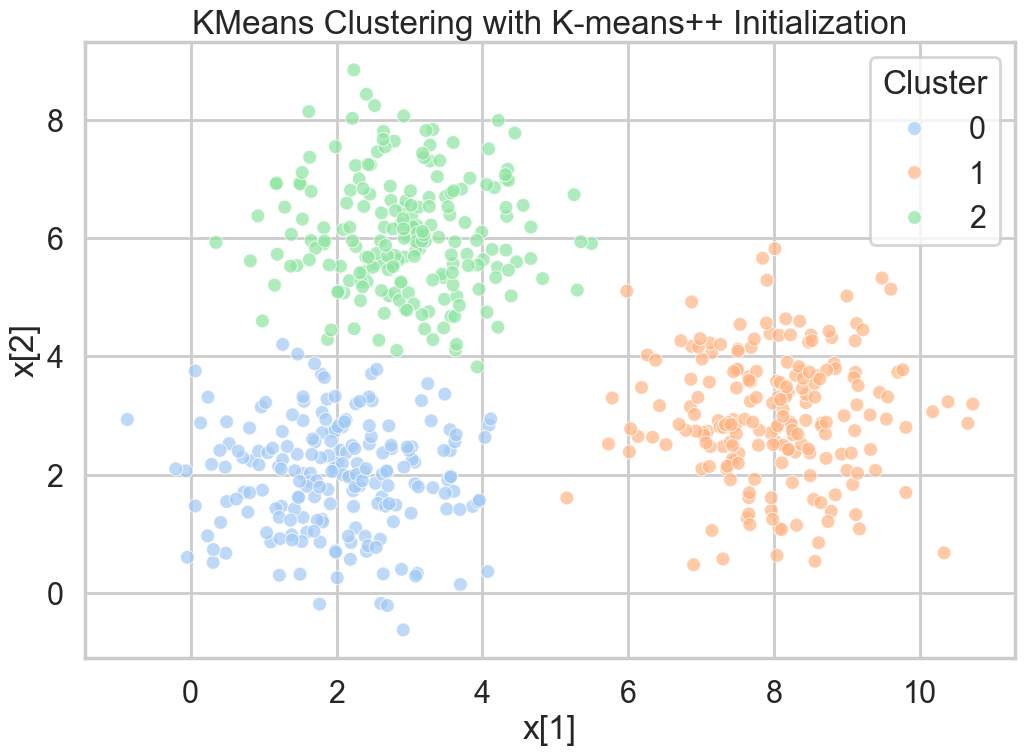

In [39]:
# K-means++ initialization
kmeans_plus = KMeans(n_clusters=3, init='kmeans++')
labels_plus = kmeans_plus.fit_predict(df[['x[1]', 'x[2]']].values)

# Plotting the results
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='x[1]', y='x[2]', hue=labels_plus, palette='pastel', s=100, alpha=0.7)
plt.title('KMeans Clustering with K-means++ Initialization')
plt.xlabel('x[1]')
plt.ylabel('x[2]')
plt.legend(title='Cluster')
plt.grid(True)

Inertia with random initialization: 1129.09
Inertia with k-means++ initialization: 1129.09
Improvement in inertia: 0.00


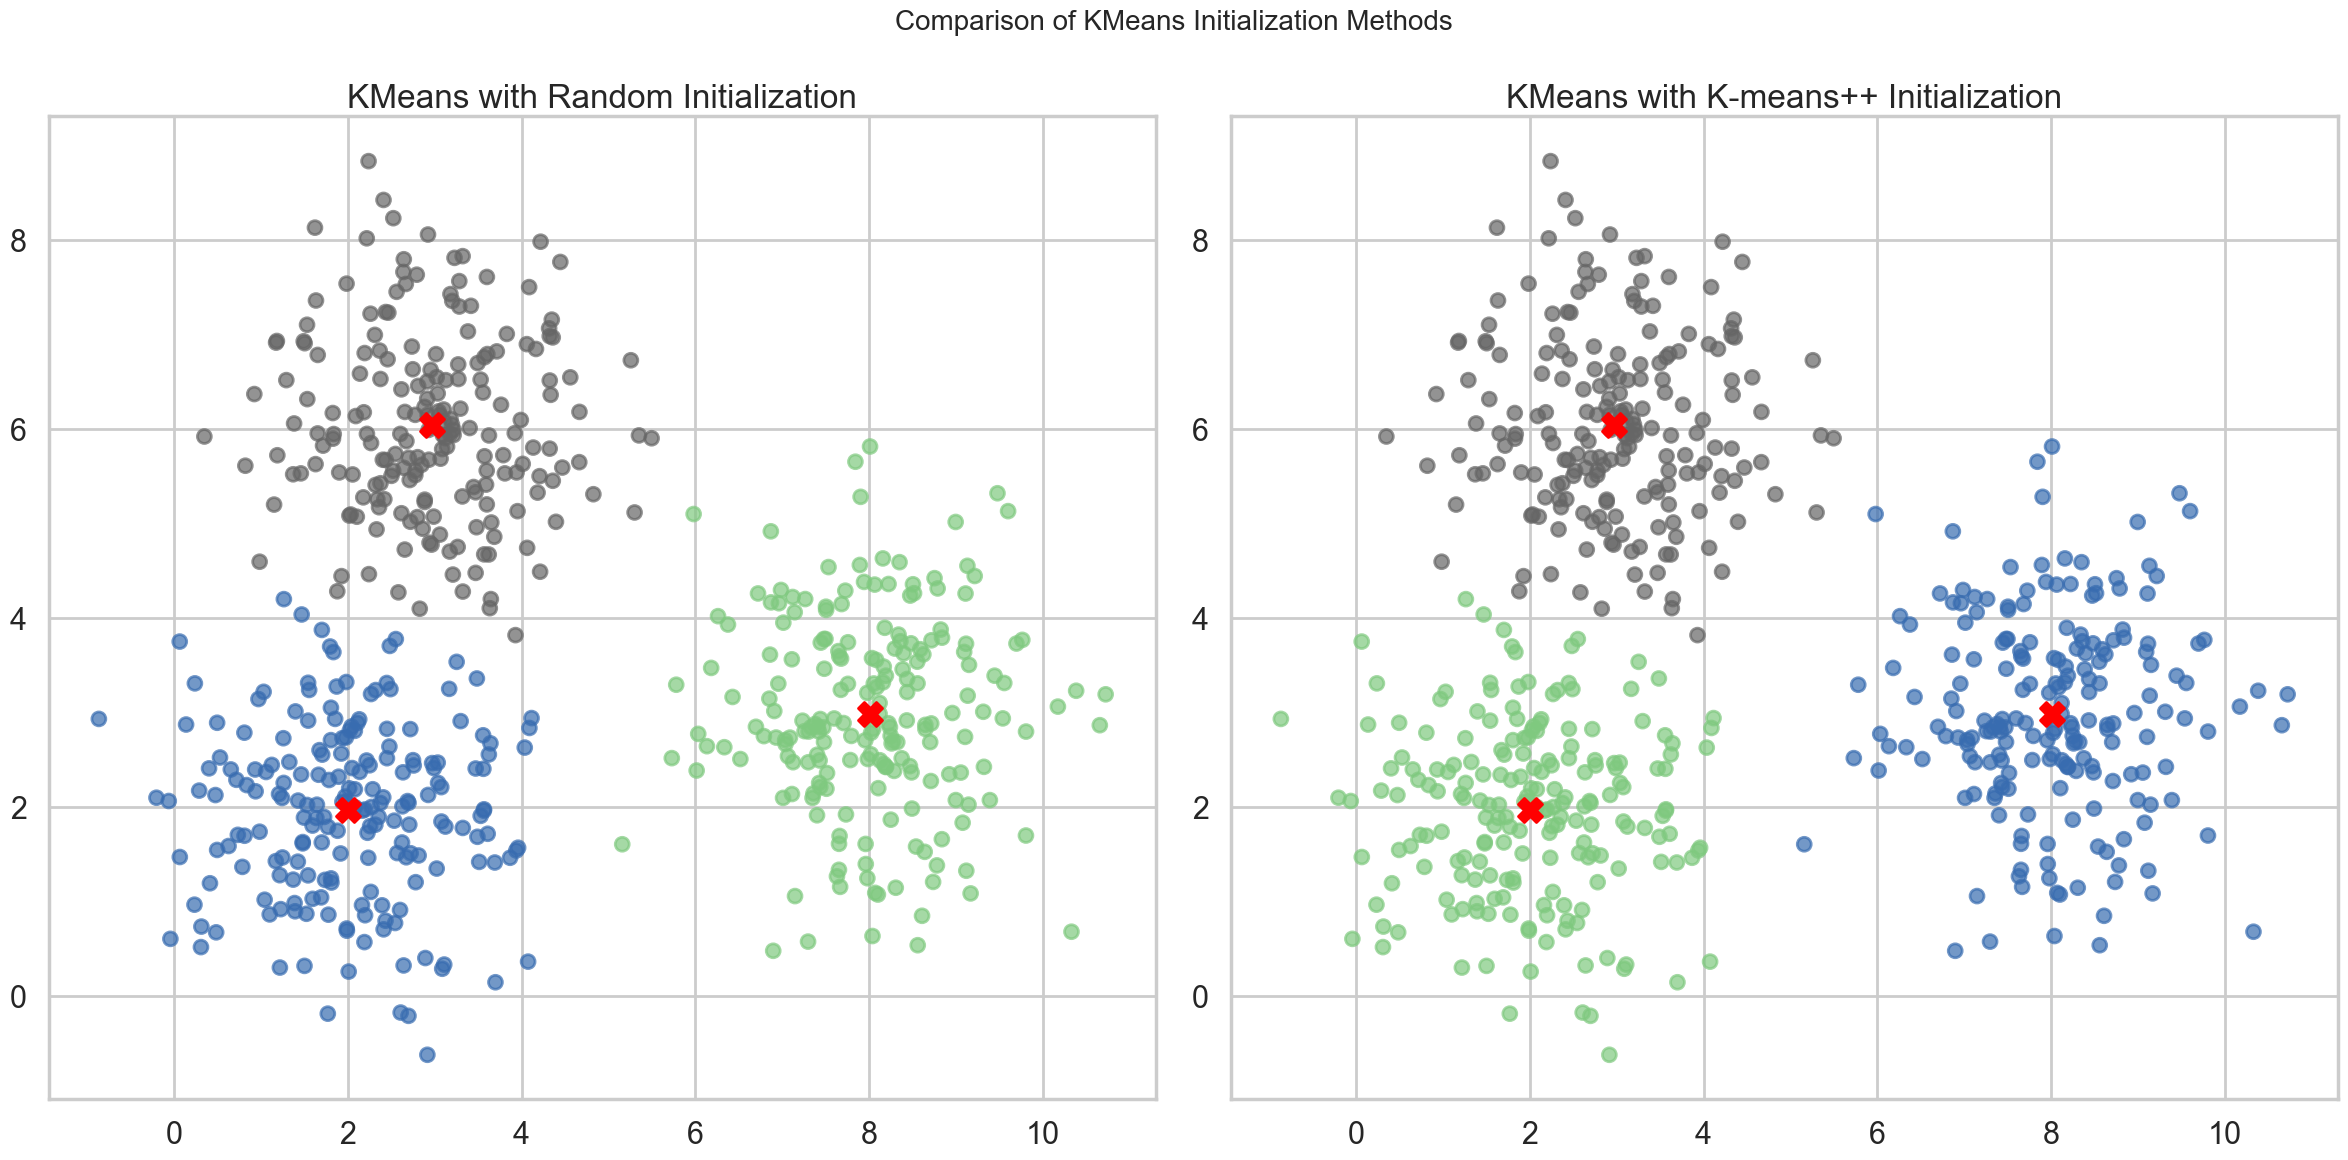

In [40]:
# Compare the two clustering results

def compute_inertia(X, centroids, labels):
    """
    Compute the inertia (sum of squared distances to closest centroid) for the given labels and centroids.

    Parameters:
    ----------
    X: np.ndarray
        The data points.
    centroids: np.ndarray
        The centroids of the clusters.
    labels: np.ndarray
        The labels assigned to each data point.

    Returns:
    -------
    float
        The inertia value.
    """
    return sum(np.linalg.norm(X[i] - centroids[labels[i]])**2 for i in range(len(X)))

# Compute inertia for both clustering results
inertia_random = compute_inertia(df[['x[1]', 'x[2]']].values, k_means_random.centroids, labels_random)
inertia_plus = compute_inertia(df[['x[1]', 'x[2]']].values, kmeans_plus.centroids, labels_plus)

print(f"Inertia with random initialization: {inertia_random:.2f}")
print(f"Inertia with k-means++ initialization: {inertia_plus:.2f}")
print(f"Improvement in inertia: {inertia_random - inertia_plus:.2f}")

# Visualize the centroids
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

# Plot - Random Initialization
axes[0].scatter(df['x[1]'], df['x[2]'], c=labels_random, cmap='Accent', s=100, alpha=0.7)
axes[0].scatter(k_means_random.centroids[:, 0], k_means_random.centroids[:, 1], c='red', s=300, marker='X', label='Centroids')
axes[0].set_title('KMeans with Random Initialization')

# Plot - K-means++ Initialization
axes[1].scatter(df['x[1]'], df['x[2]'], c=labels_plus, cmap='Accent', s=100, alpha=0.7)
axes[1].scatter(kmeans_plus.centroids[:, 0], kmeans_plus.centroids[:, 1], c='red', s=300, marker='X', label='Centroids')
axes[1].set_title('KMeans with K-means++ Initialization')

plt.suptitle('Comparison of KMeans Initialization Methods', fontsize=20)
plt.tight_layout()
plt.show()

In [41]:
X = df[['x[1]', 'x[2]']].values
n_runs = 100
inertias_random = []
inertias_kpp = []

for seed in range(n_runs):
    # Random init
    k_random = KMeans(n_clusters=3, init='random', random_state=seed)
    k_random.fit(X)
    inertia_r = np.sum(np.min(np.linalg.norm(X[:, np.newaxis] - k_random.centroids, axis=2)**2, axis=1))
    inertias_random.append(inertia_r)

    # KMeans++ init
    k_kpp = KMeans(n_clusters=3, init='kmeans++', random_state=seed)
    k_kpp.fit(X)
    inertia_k = np.sum(np.min(np.linalg.norm(X[:, np.newaxis] - k_kpp.centroids, axis=2)**2, axis=1))
    inertias_kpp.append(inertia_k)

# Convert to DataFrame for plotting
results_df = pd.DataFrame({
    'Inertia': inertias_random + inertias_kpp,
    'Method': ['Random'] * n_runs + ['KMeans++'] * n_runs
})

# Print means
print(f"Average Inertia - Random: {np.mean(inertias_random):.2f}")
print(f"Average Inertia - KMeans++: {np.mean(inertias_kpp):.2f}")

Average Inertia - Random: 1304.89
Average Inertia - KMeans++: 1256.94


### Nhận xét

Phương pháp:
So sánh hai thuật toán khởi tạo centroid trong K-means:
- Khởi tạo ngẫu nhiên (Random initialization): Các centroid ban đầu được chọn ngẫu nhiên từ tập dữ liệu
- Khởi tạo K-means++ (K-means++ initialization): Các centroid được chọn một cách chủ đích. Sau khi chọn ngẫu nhiên centroid đầu tiên, các centroid tiếp theo được chọn với xác suất tỷ lệ thuận với bình phương khoảng cách đến centroid gần nhất đã chọn. Điều này giúp chọn các điểm nằm **xa các centroid hiện có**, nhằm phân bố các centroid khởi tạo **rải đều hơn** trong không gian dữ liệu.

Thực hiện K-means với cả hai phương pháp khởi tạo trên 100 lần chạy lặp lại và ghi nhận giá trị **inertia trung bình** (tổng bình phương khoảng cách từ mỗi điểm đến centroid gần nhất):
- Trung bình Inertia (Random): **1304.89**
- Trung bình Inertia (K-means++): **1256.94**

Phân tích:

Từ kết quả trên, có thể thấy rằng K-means++ liên tục cho kết quả tốt hơn trong việc tối thiểu hóa hàm mục tiêu so với khởi tạo ngẫu nhiên. Điều này cho thấy bước khởi tạo centroid đóng vai trò then chốt trong hiệu quả tổng thể của thuật toán.

Việc lựa chọn các centroid có tính đại diện cao giúp thuật toán hội tụ nhanh hơn.

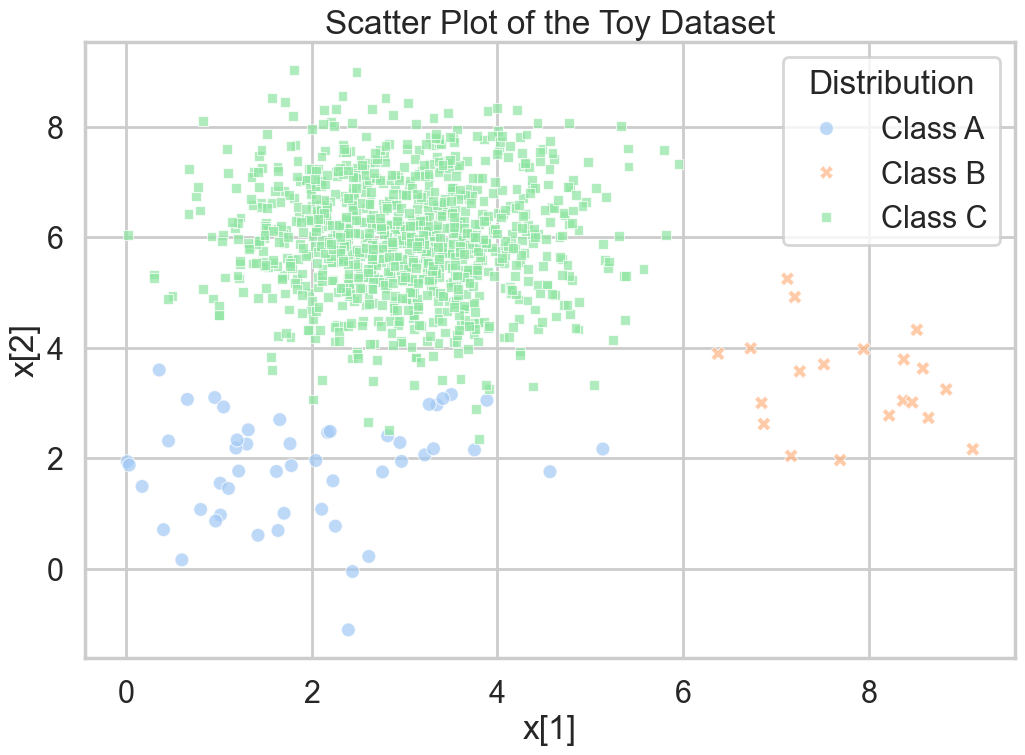

In [42]:
"""" 
Assignment 2:
Generate a toy dataset:
    50 points of them are from a Gaussian distribution with mean [2, 2] and covariance [[1, 0], [0, 1]]
    20 points of them are from a Gaussian distribution with mean [8, 3] and covariance [[1, 0], [0, 1]]
    1000 points of them are from a Gaussian distribution with mean [3, 6] and covariance [[1, 0], [0, 1]]
"""

# Parameters for the Gaussian distributions
mean1 = np.array([2, 2])
mean2 = np.array([8, 3])
mean3 = np.array([3, 6])

cov = np.array([[1, 0], [0, 1]])

# Number of samples for each distribution
num_samples1 = 50
num_samples2 = 20
num_samples3 = 1000

# Generate samples from each Gaussian distribution
df1 = generate_gaussian_data(mean1, cov, num_samples1)
df2 = generate_gaussian_data(mean2, cov, num_samples2)
df3 = generate_gaussian_data(mean3, cov, num_samples3)

# Concatenate the DataFrames
df = pd.concat([df1, df2, df3], ignore_index=True)

# Add a label column to indicate the distribution
df['label'] = ['Class A'] * num_samples1 + ['Class B'] * num_samples2 + ['Class C'] * num_samples3

# Visualize the dataset
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='x[1]', y='x[2]', hue='label', style='label', s=100, alpha=0.7)
plt.title('Scatter Plot of the Toy Dataset')
plt.xlabel('x[1]')
plt.ylabel('x[2]')
plt.legend(title='Distribution')
plt.grid(True)
plt.show()

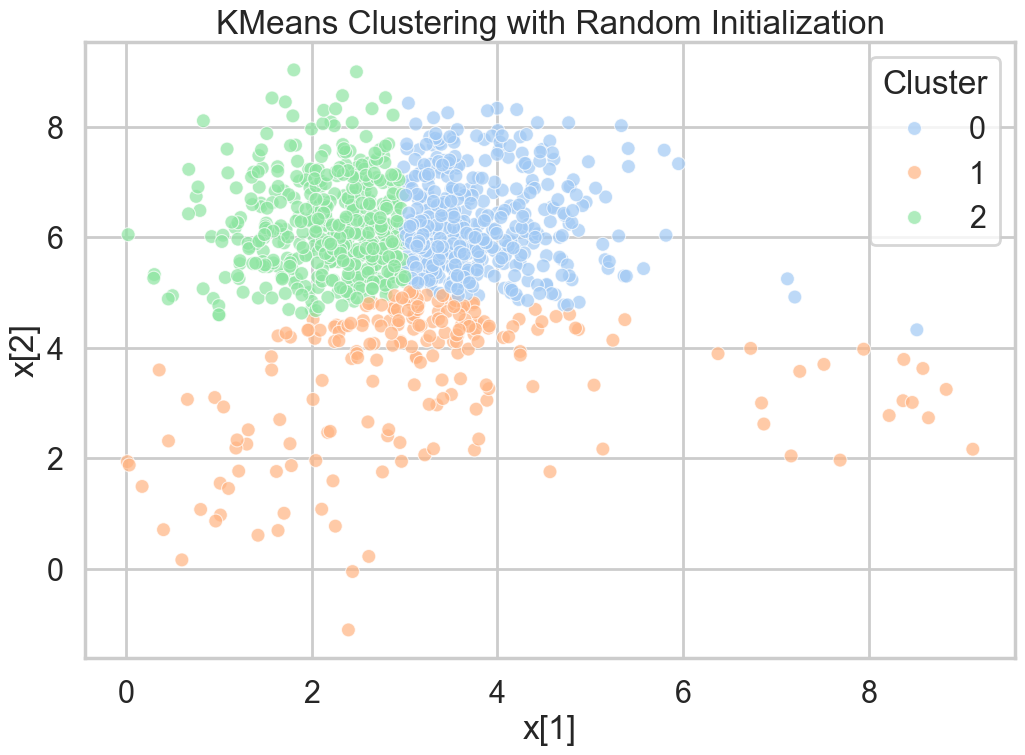

In [43]:
# Random initialization
k_means_random = KMeans(n_clusters=3, init='random')
labels_random = k_means_random.fit_predict(df[['x[1]', 'x[2]']].values)

# Plotting the results
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='x[1]', y='x[2]', hue=labels_random, palette='pastel', s=100, alpha=0.7)
plt.title('KMeans Clustering with Random Initialization')
plt.xlabel('x[1]')
plt.ylabel('x[2]')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

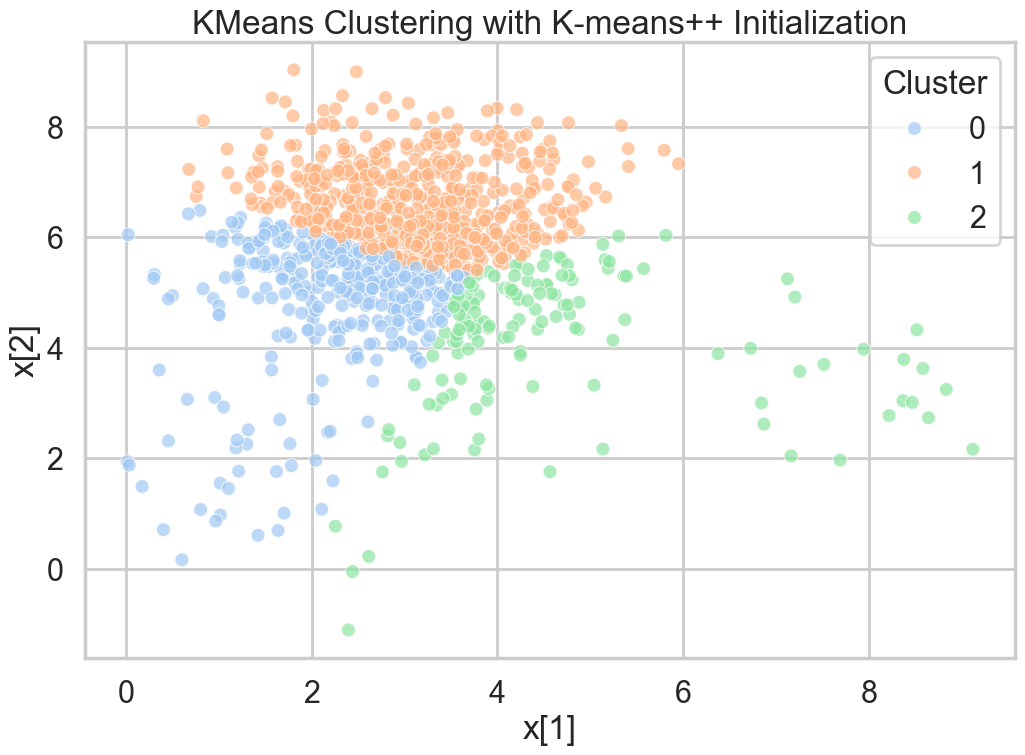

In [44]:
# K-means++ initialization
kmeans_plus = KMeans(n_clusters=3, init='kmeans++')
labels_plus = kmeans_plus.fit_predict(df[['x[1]', 'x[2]']].values)

# Plotting the results
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='x[1]', y='x[2]', hue=labels_plus, palette='pastel', s=100, alpha=0.7)
plt.title('KMeans Clustering with K-means++ Initialization')
plt.xlabel('x[1]')
plt.ylabel('x[2]')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Inertia with random initialization: 1867.28
Inertia with k-means++ initialization: 1958.96
Improvement in inertia: -91.69


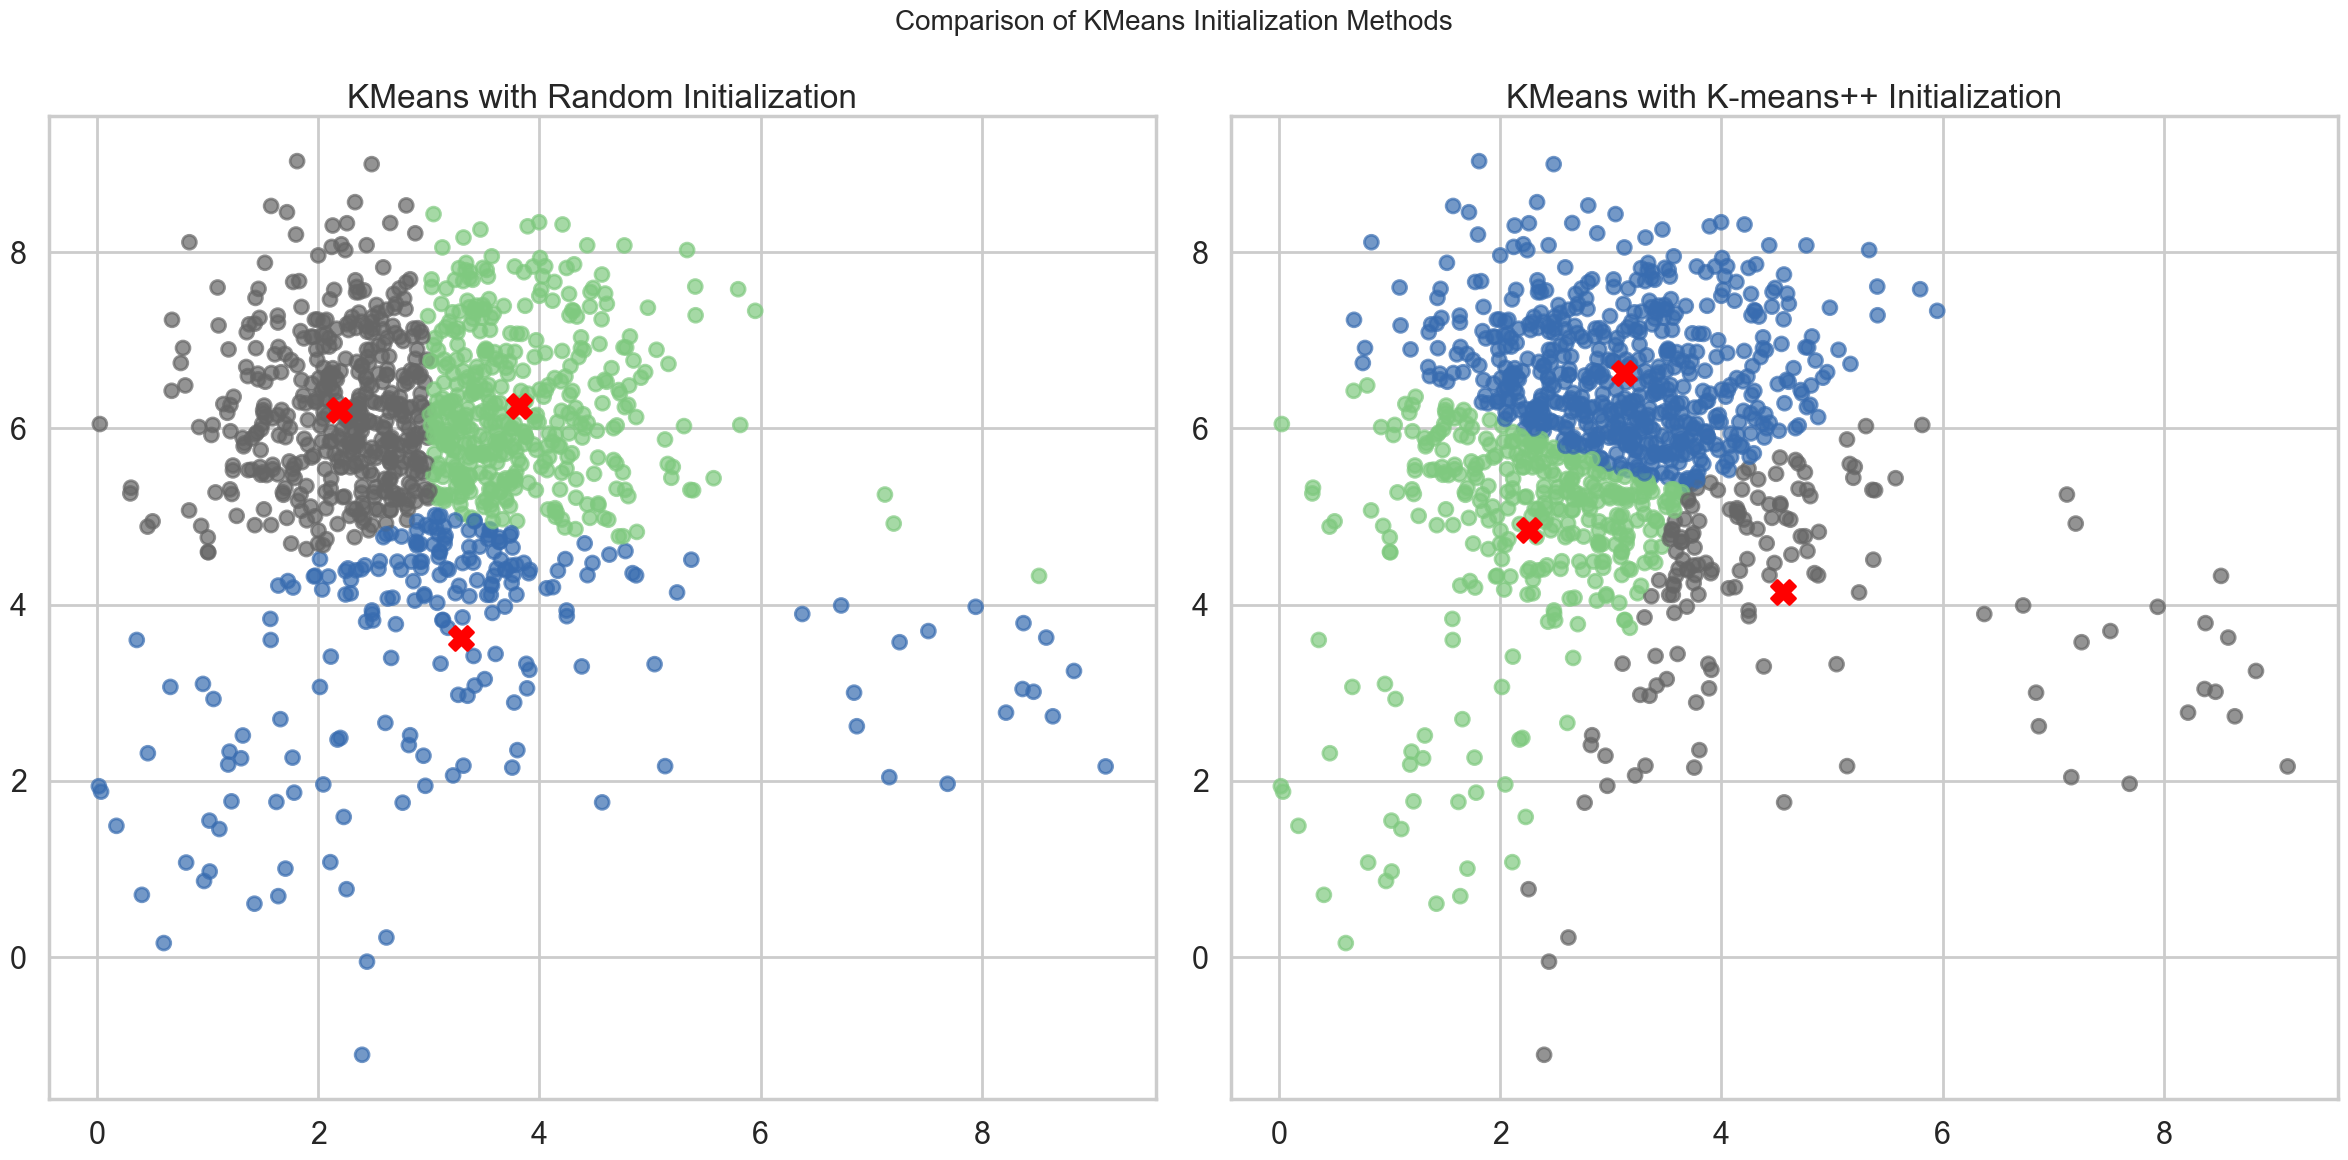

In [45]:
# Compare the two clustering results

# Compute inertia for both clustering results
inertia_random = compute_inertia(df[['x[1]', 'x[2]']].values, k_means_random.centroids, labels_random)
inertia_plus = compute_inertia(df[['x[1]', 'x[2]']].values, kmeans_plus.centroids, labels_plus)

print(f"Inertia with random initialization: {inertia_random:.2f}")
print(f"Inertia with k-means++ initialization: {inertia_plus:.2f}")
print(f"Improvement in inertia: {inertia_random - inertia_plus:.2f}")

# Visualize the centroids
fig, axes = plt.subplots(1, 2, figsize=(24, 12))

# Plot - Random Initialization
axes[0].scatter(df['x[1]'], df['x[2]'], c=labels_random, cmap='Accent', s=100, alpha=0.7)
axes[0].scatter(k_means_random.centroids[:, 0], k_means_random.centroids[:, 1], c='red', s=300, marker='X', label='Centroids')
axes[0].set_title('KMeans with Random Initialization')

# Plot - K-means++ Initialization
axes[1].scatter(df['x[1]'], df['x[2]'], c=labels_plus, cmap='Accent', s=100, alpha=0.7)
axes[1].scatter(kmeans_plus.centroids[:, 0], kmeans_plus.centroids[:, 1], c='red', s=300, marker='X', label='Centroids')
axes[1].set_title('KMeans with K-means++ Initialization')

plt.suptitle('Comparison of KMeans Initialization Methods', fontsize=20)
plt.tight_layout()
plt.show()

### Nhận xét:

Phương pháp:
So sánh kết quả phân tích cụm giữa hai phương pháp khởi tạo centroid.

Kết luận:
Random initialization thu được kết quả inertia tốt hơn nhưng phân cụm không phản ánh đúng phân bố dữ liệu. Ngược lại, phân cụm K-Means++ có ý nghĩa thực tế hơn nhưng vẫn có sai lệch đáng kể so với dữ liệu gốc.

Điều này cho thấy thuật toán K-Means hoạt động không hiệu quả trên tập dữ liệu có chênh lệch kích thước giữa các cụm lớn. Các cụm lớn với độ phân tán rộng thường chiếm ưu thế trong quá trình cập nhật centroid do ảnh hưởng lớn từ số lượng điểm dữ liệu nhiều hơn.


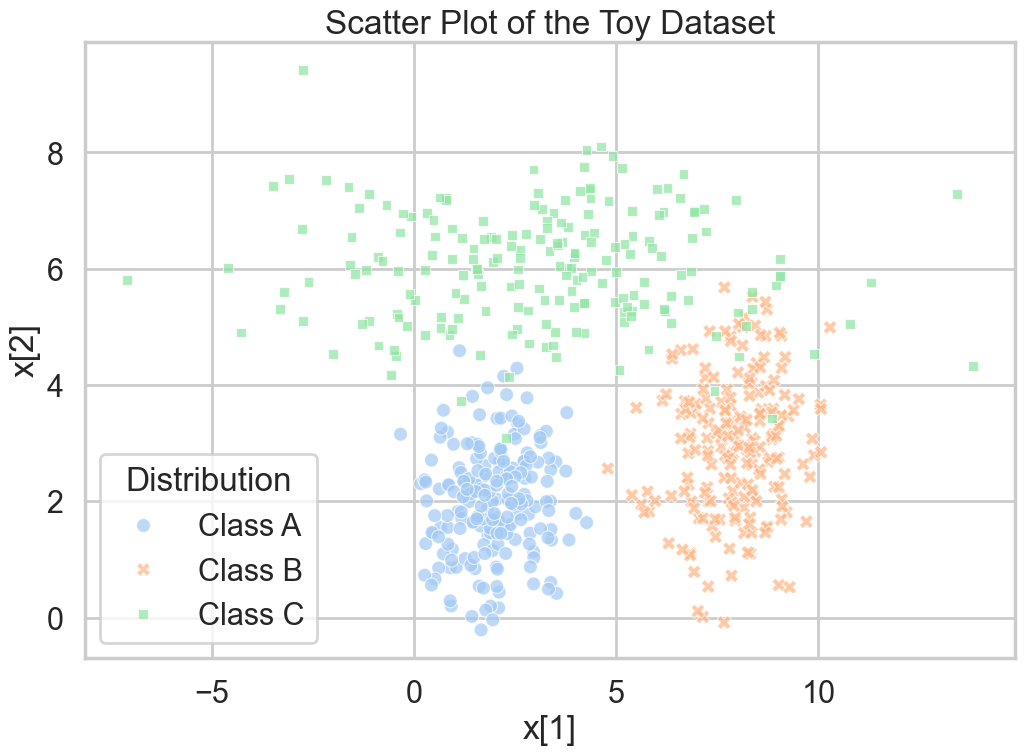

In [46]:
""""
Assignment 3:
Generate a toy dataset:
    200 points of them are from a Gaussian distribution with mean [2, 2] and covariance [[1, 0], [0, 1]]
    200 points of them are from a Gaussian distribution with mean [8, 3] and covariance [[1, 0], [0, 1]]
    200 points of them are from a Gaussian distribution with mean [3, 6] and covariance [[10, 0], [0, 1]]
"""

# Parameters for the Gaussian distributions
mean1 = np.array([2, 2])
mean2 = np.array([8, 3])
mean3 = np.array([3, 6])

cov1 = np.array([[1, 0], [0, 1]])
cov2 = np.array([[1, 0], [0, 1]])
cov3 = np.array([[10, 0], [0, 1]])

# Number of samples for each distribution
num_samples1 = 200
num_samples2 = 200
num_samples3 = 200

# Generate samples from each Gaussian distribution
df1 = generate_gaussian_data(mean1, cov1, num_samples1)
df2 = generate_gaussian_data(mean2, cov2, num_samples2)
df3 = generate_gaussian_data(mean3, cov3, num_samples3)

# Concatenate the DataFrames
df = pd.concat([df1, df2, df3], ignore_index=True)

# Add a label column to indicate the distribution
df['label'] = ['Class A'] * num_samples1 + ['Class B'] * num_samples2 + ['Class C'] * num_samples3

# Visualize the dataset
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='x[1]', y='x[2]', hue='label', style='label', s=100, alpha=0.7)
plt.title('Scatter Plot of the Toy Dataset')
plt.xlabel('x[1]')
plt.ylabel('x[2]')
plt.legend(title='Distribution')
plt.grid(True)
plt.show()

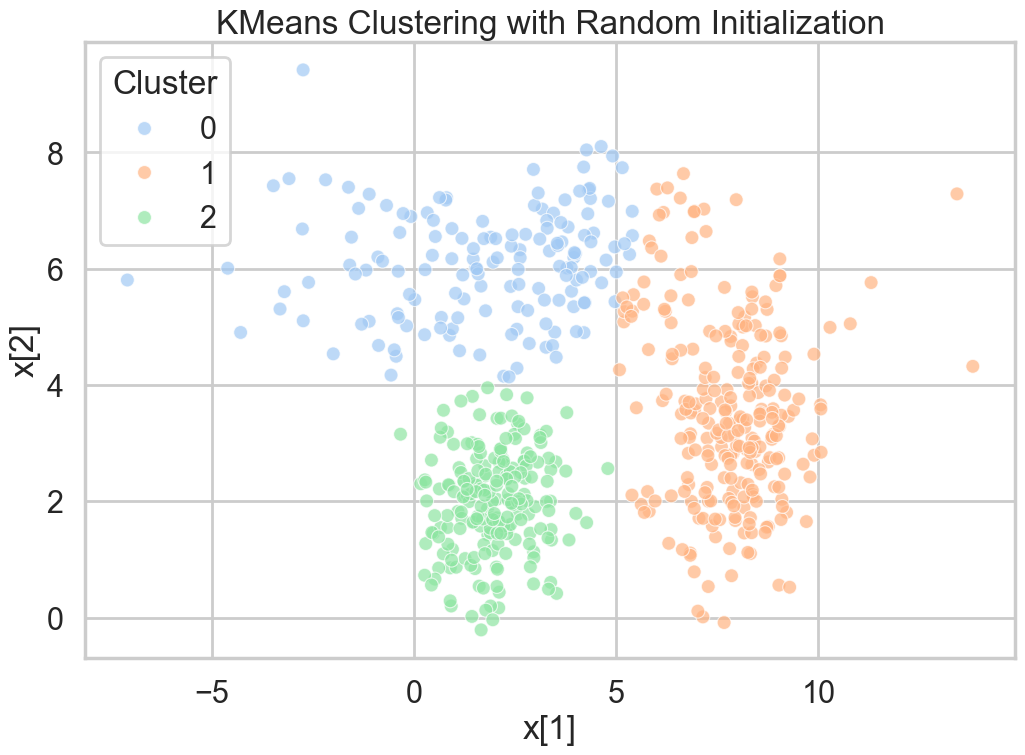

In [47]:
# Random initialization
k_means_random = KMeans(n_clusters=3, init='random', random_state=42)
labels_random = k_means_random.fit_predict(df[['x[1]', 'x[2]']].values)

# Visualize the results with random initialization
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='x[1]', y='x[2]', hue=labels_random, palette='pastel', s=100, alpha=0.7)
plt.title('KMeans Clustering with Random Initialization')
plt.xlabel('x[1]')
plt.ylabel('x[2]')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

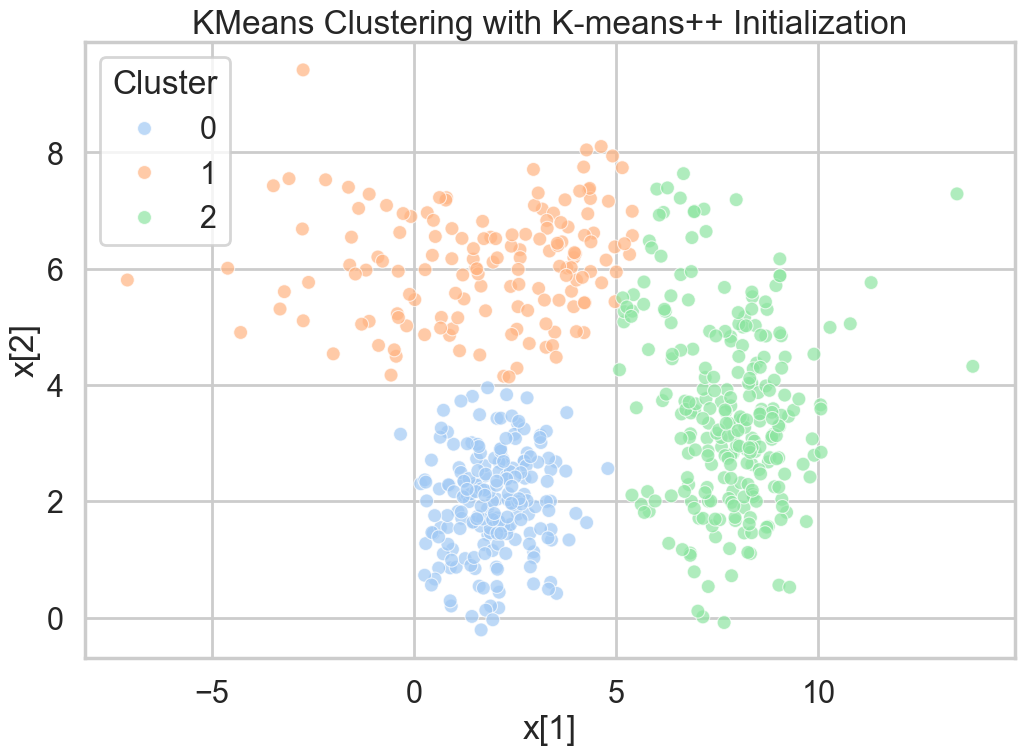

In [48]:
# K-means++ initialization
kmeans_plus = KMeans(n_clusters=3, init='kmeans++', random_state=42)
labels_plus = kmeans_plus.fit_predict(df[['x[1]', 'x[2]']].values)

# Visualize the results with k-means++ initialization
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='x[1]', y='x[2]', hue=labels_plus, palette='pastel', s=100, alpha=0.7)
plt.title('KMeans Clustering with K-means++ Initialization')
plt.xlabel('x[1]')
plt.ylabel('x[2]')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### Kết luận
Cụm dữ liệu được sinh ra từ phân phối Gaussian $\mathcal{N}((3, 6), \Sigma_2)$, có phương sai lớn hơn rất nhiều theo chiều đầu tiên so với các cụm còn lại.

Điều này sẽ gây ra một số khó khăn cho thuật toán K=means.
- K-means giả định các cụm có hình cầu và kích thước tương đối đồng đều. Cụm kéo dài với phương sai lớn theo một chiều khó mà được biểu diễn tốt bằng một centroid duy nhất.
- Các điểm ở vùng mép cụm dễ bị phân nhầm qua các cụm nhỏ hơn để giảm hàm mục tiêu, làm sai lệch ranh giới cụm thật sự.